# Utilisations des transform√©s de Fourier pour les bruits

Quand on parle de bruit on parle souvent aussi de **fr√©quences**. En effet un bruit m√™me si il est purement al√©atoire peut √™tre consid√©r√©e comme une **suite de fonctions √† divers fr√©quences** qui peut aller jusqu'√† une infinit√© de fonctions pour un bruit totalement al√©atoire (mais **fini sur un domaine born√© et d√©nombrable**).
    
Ainsi on peut en tirer deux questions : Que se passerait-il si on **filtrer les fr√©quences d'un bruit** de Perlin ? Ou encore pour un bruit **purement al√©atoire** <=> Est-il possible de **produire un nouveau bruit** pseudo-al√©atoire avec la transform√© de Fourier ?

**Plan** :
1. **Filtres fr√©quentiels** pour le bruit de **Perlin** $\\[0 cm]$
    - G√©n√©ration du bruit de **Perlin**
    - **Domaine fr√©quentiel** du bruit ($TF[]$)
    - **Filtre** et retour au domaine spatial ($TF^{-1}[]$) $\\[0 cm]$
2. G√©n√©ration d'un **nouveau bruit pseudo-al√©atoire** $\\[0 cm]$
    - G√©n√©ration du bruit **Random**
    - Domaine fr√©quentiel du bruit
    - Filtre et retour au domaine spatial

## Filtres fr√©quentiels

On souhaite avoir qu'un √©chantillon des fr√©quences d'un bruit de Perlin "complet" afin de v√©rifier ce que nous avons dit plus haut et voir si on peut avoir un bruit de Perlin √† faible fr√©quence si on utilise un filtre passe-bas sur le domaine fr√©quentiel.

### G√©n√©ration du bruit de Perlin

On commence donc par g√©n√©rer notre bruit de Perlin, via le module que nous avons d√©velopp√© pr√©cedemment, en lui mettant une tr√®s forte fr√©quence spatiale ainsi qu'une bonne r√©solution.

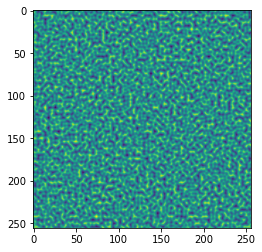

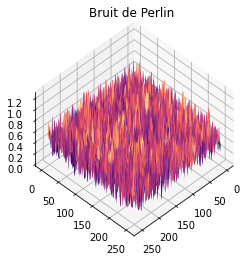

In [488]:
import numpy as np
import perlin2D as perlin
import matplotlib.pyplot as plt

#La TF est calcul√©e plus vite si on est en puissance de 2(car m√©thode qu'utilise numpy)
shape = 2**8
noise = perlin.Perlin2D([shape,shape],[2**6,2**6]).noise

#On g√©n√®re une grille/syst√®me de coo pour pyplot
X, Y = np.mgrid[0:shape, 0:shape]

#On rend le bruit en 2D
fig = plt.figure(figsize = (4,4))
ax = plt.axes()
ax.imshow(noise)
plt.show()

#On rend le bruit en 3D
fig = plt.figure(figsize = (4,4))
ax = plt.axes(projection ='3d')
ax.set_proj_type('ortho')
ax.view_init(45, 45)
ax.set_zlim3d(0,1.3)
plt.title('Bruit de Perlin')
ax.plot_surface(X, Y, noise, cmap="magma",linewidth=0, antialiased=True)

### Domaine fr√©quentiel du bruit ( ùëáùêπ[] )

Appliquons la transform√© de Fourier pour ce bruit, nous utiliserons une unit√© arbitraire pour la fr√©quence qui est de 1 √† {shape} (ici 512). Les basses fr√©quences sont celles proches de 0.


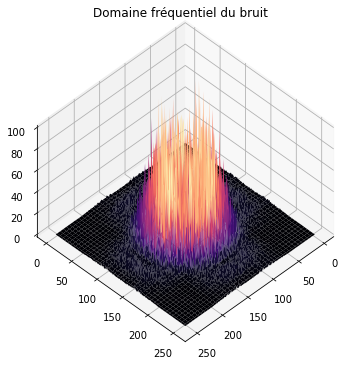

In [469]:
#On applique la tf 2D √† l'aide de numpy
fft = np.fft.fft2(noise)

#On centre la TF, seulement pour le c√¥t√© visuel d'o√π une variable √† c√¥t√©.
dfft = np.fft.fftshift(fft/2)

#param√®tres du rendu
fig = plt.figure(figsize = (4,4))
ax = plt.axes(projection ='3d')
ax.set_proj_type('ortho')
ax.view_init(45, 45)
ax.set_zlim3d(0,100)
plt.title("Domaine fr√©quentiel du bruit")

#coordonn√©es
x, y = np.mgrid[:shape,:shape]

#On rend les valeurs absolues des valeurs de la matrice du bruit car √ßa permet d'avoir une belle r√©partition de couleur. 
ax.plot_surface(x, y, np.abs(dfft[:len(x),:len(y)]), cmap="magma",linewidth=0, antialiased=True)

On observe bien que le nombre de fr√©quences est √©lev√© vu la complexit√© apparente de la fonction 2D. 

### Filtre et retour au domaine spatial ( ùëáùêπ‚àí1[] )

On programme une simple fonction de filtre qui si la fr√©quence est trop haute ou basse on r√©duit le bruit √† 0.
Puis on applique la transform√©e de Fourier inverse.



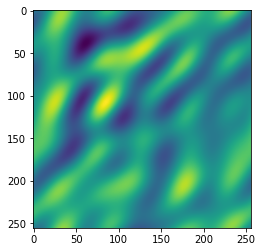

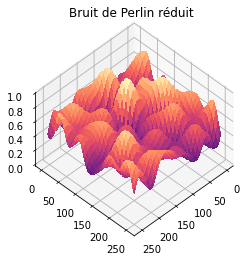

In [487]:

#Bornes du filtre
limit_f = [0,5]
fX = X
fY = Y

#On v√©rifie si on est bien dans les bornes, sinon on r√©duit le bruit √† 0
l_fft = np.copy(fft[:len(fX),:len(fY)])
for i in range(len(fX)):
    for j in range(len(fY)):
        if(fX[i][0] > limit_f[1] or fY[0][j] > limit_f[1] or fX[i][0] < limit_f[0] or fY[0][j] < limit_f[0]):
            l_fft[i][j] = 0

#On retourne dans le domaine spatiale avec la TF inverse
ifft = np.fft.ifft2(l_fft)
#On prend les valeurs r√©els, celles qui ont un r√©el sens physique.
low_noise = np.real(ifft)

#Rendu 2D du bruit
fig = plt.figure(figsize = (4,4))
ax = plt.axes()
ax.imshow(low_noise)
plt.show()
  
#rendu et normalisation du bruit pour la 3D
X, Y = np.mgrid[0:len(low_noise), 0:len(low_noise)]
low_noise = low_noise - low_noise.min()
low_noise = low_noise / low_noise.max()
fig = plt.figure(figsize = (4,4))
ax = plt.axes(projection ='3d')
ax.set_proj_type('ortho')
ax.view_init(45, 45)
plt.title('Bruit de Perlin r√©duit')
ax.plot_surface(X, Y, low_noise, cmap="magma",linewidth=0, antialiased=False)
        

## G√©n√©ration d'un nouveau bruit pseudo-al√©atoire

Si on observe un bruit purement al√©atoire et un bruit de Perlin √† haute fr√©quence spatiale initiale on voit une forte ressemblance et on ne voit pas la diff√©rence si la fr√©quence est assez haute avec une r√©solution faible, en effet quand la fr√©quence augmente les "bulles" du bruit de Perlin vont diminuer en taille et finir par former des points comme pour un bruit Random.

![](img/bruitperlinrandom.png)

Il serait donc int√©ressant d'essayer d'appliquer un filtre passe-bas pour un bruit random et voir ce que √ßa donne.

### G√©n√©ration du bruit Random

Commen√ßons par g√©n√©rer un bruit totalement(hypoth√©tiquement) al√©atoire.

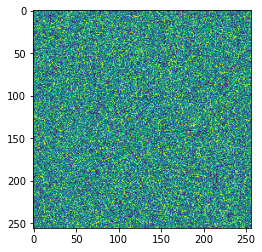

In [1]:
import numpy as np
import matplotlib.pyplot as plt

shape = 2**8
#On g√©n√®re le bruit al√©atoire
noise = np.random.rand(shape, shape)
#Rendu
fig = plt.figure(figsize = (4,4))
ax = plt.axes()
ax.imshow(noise)
plt.show()

### Domaine fr√©quentiel du bruit
M√™me √©tape que pr√©cedemment: On applique une premi√®re TF au bruit random.

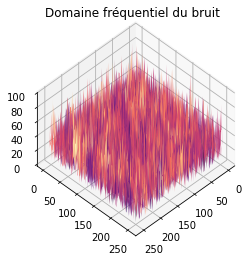

In [2]:
#On applique la tf 2D √† l'aide de numpy
fft = np.fft.fft2(noise)

#On centre la TF, seulement pour le c√¥t√© visuel d'o√π une variable √† c√¥t√©.
dfft = np.fft.fftshift(fft/2)

#param√®tres du rendu
fig = plt.figure(figsize = (4,4))
ax = plt.axes(projection ='3d')
ax.set_proj_type('ortho')
ax.view_init(45, 45)
ax.set_zlim3d(0,100)
plt.title("Domaine fr√©quentiel du bruit")

#coordonn√©es
x, y = np.mgrid[:shape,:shape]

#On rend les valeurs absolues des valeurs de la matrice du bruit car √ßa permet d'avoir une belle r√©partition de couleur. 
ax.plot_surface(x, y, np.abs(dfft[:len(x),:len(y)]), cmap="magma",linewidth=0, antialiased=True)

On observe que √ßa a l'air tout autant al√©atoire que le bruit d'origine. Mais que se passe t-il si on applique un filtre passe-bas ? Le bruit sera t-il coh√©rent dans l'espace ?

### Filtre et retour au domaine spatial

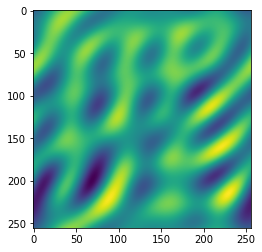

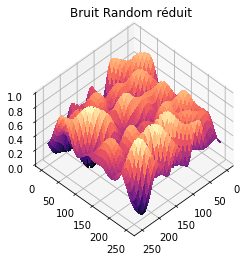

In [4]:

#Bornes du filtre
limit_f = [0,5]
fX, fY = np.mgrid[0:shape, 0:shape]

#On v√©rifie si on est bien dans les bornes, sinon on r√©duit le bruit √† 0
l_fft = np.copy(fft[:len(fX),:len(fY)])
for i in range(len(fX)):
    for j in range(len(fY)):
        if(fX[i][0] > limit_f[1] or fY[0][j] > limit_f[1] or fX[i][0] < limit_f[0] or fY[0][j] < limit_f[0]):
            l_fft[i][j] = 0

#On retourne dans le domaine spatiale avec la TF inverse
ifft = np.fft.ifft2(l_fft)
#On prend les valeurs r√©els, celles qui ont un r√©el sens physique.
low_noise = np.real(ifft)

#Rendu 2D du bruit
fig = plt.figure(figsize = (4,4))
ax = plt.axes()
ax.imshow(low_noise)
plt.show()
  
#rendu et normalisation du bruit pour la 3D
X, Y = np.mgrid[0:len(low_noise), 0:len(low_noise)]
low_noise = low_noise - low_noise.min()
low_noise = low_noise / low_noise.max()
fig = plt.figure(figsize = (4,4))
ax = plt.axes(projection ='3d')
ax.set_proj_type('ortho')
ax.view_init(45, 45)
plt.title('Bruit Random r√©duit')
ax.plot_surface(X, Y, low_noise, cmap="magma",linewidth=0, antialiased=False)

On finit par observer un bruit tr√®s similaire au bruit de Perlin, tellement qu'on ne voit pas la diff√©rence. Nous avons donc g√©n√©r√© une alternative au bruit de Fourier. Pourquoi n'est-elle pas plus utilis√©e ? Car faire 2 transform√©es de Fourier demande bien plus d'op√©rations que celles utilis√©s pour le bruit de Perlin ou le bruit Simplex(version am√©lior√©e du bruit de Perlin(dev aussi par Ken Perlin)).

![](img/benchmark.png)

On observe qu'en effet plus notre taille est grande plus la m√©thode avec la TF va √™tre cher en performance. N√©anmoins pour des petites r√©solutions le temps de rendu est similaire, par exemple pour notre cas: 512 = $2^8$. N√©anmoins pour une r&elle utilisation les r√©solutions sont bien plus grande, d'o√π le grand besoin d'optimisations pour avoir du temps r√©el n√©cessaire dans les jeux vid√©os par exemple.